# Initializations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
#from matplotlib import colors
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.mixture import GaussianMixture
import seaborn as sns

In [2]:
locations = pd.read_csv("velibAdds.csv", sep=' ')
loading = pd.read_csv("velibLoading.csv", sep=' ')

In [3]:
locations.head()

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE


In [4]:
loading.head()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758


In [5]:
loading.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189],
           dtype='int64', length=1189)

# Descriptive statistics

## Analysis of three stations

First we select three random stations from our sample.

In [8]:
locations

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE
...,...,...,...,...
1185,2.360216,48.884570,0,CHAPELLE MARX DORMOY
1186,2.316184,48.847770,0,DUROC
1187,2.314630,48.811102,1,GEORGES MESSIER (MONTROUGE)
1188,2.439893,48.848258,0,VORGES (VINCENNES)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

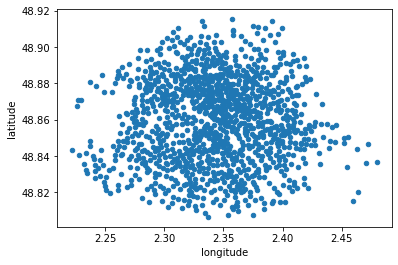

In [7]:
locations.plot.scatter(
    x='longitude',
    y='latitude'
)

In [8]:
locations.sample(n=3, random_state=1)

,longitude,latitude,bonus,names
389,2.288866,48.871361,0,PAUL VALÉRY
1004,2.346262,48.882108,0,TRUDAINRE ROCHECHOUART
1082,2.332610,48.816981,0,VAILLANT COUTURIER


## Daily usage patterns

# Principal component analysis

In [9]:
pca = PCA()
loadingScaled = pd.DataFrame(scale(loading), columns = loading.columns)
principalComponents = pca.fit(loadingScaled).transform(loadingScaled)

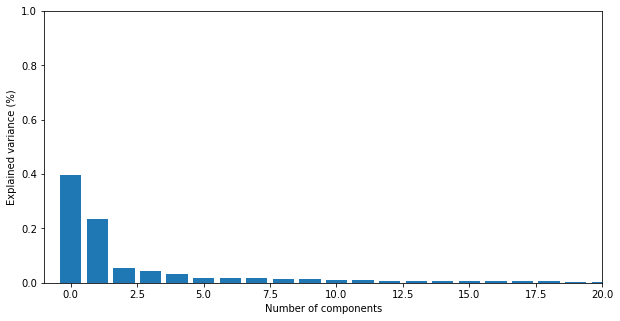

In [10]:
plt.figure(figsize = (10,5))
x=np.arange(pca.explained_variance_ratio_.size)
plt.bar(x, pca.explained_variance_ratio_)
plt.axis((-1, 20, 0, 1))
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.show()

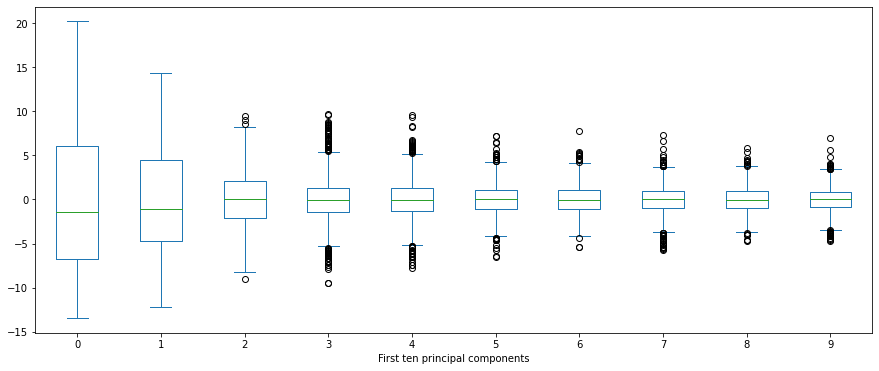

In [11]:
pd.DataFrame(principalComponents[:,0:10]).plot(kind = "box", figsize = (15, 6) )
plt.xlabel('First ten principal components')
plt.show()

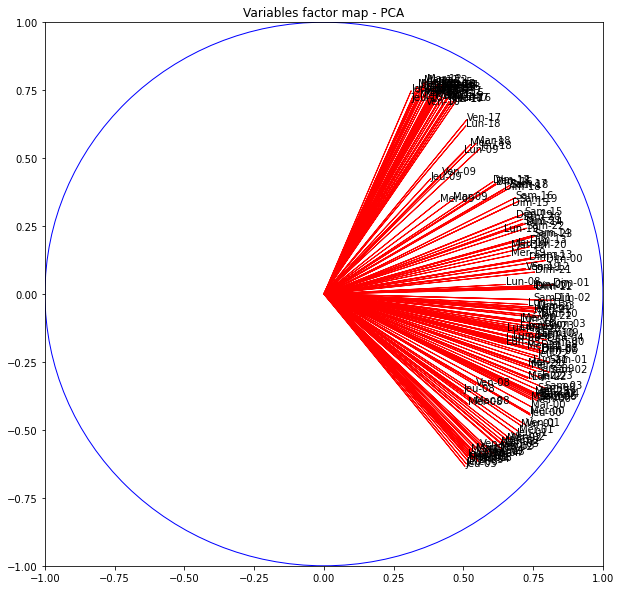

In [12]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, name in zip(coord1, coord2, loadingScaled.columns):
    plt.text(i, j, name)
    plt.arrow(0, 0, i, j, color = 'r', width = 0.0001)
plt.axis((-1, 1, -1, 1))
c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.title('Variables factor map - PCA')
plt.show()

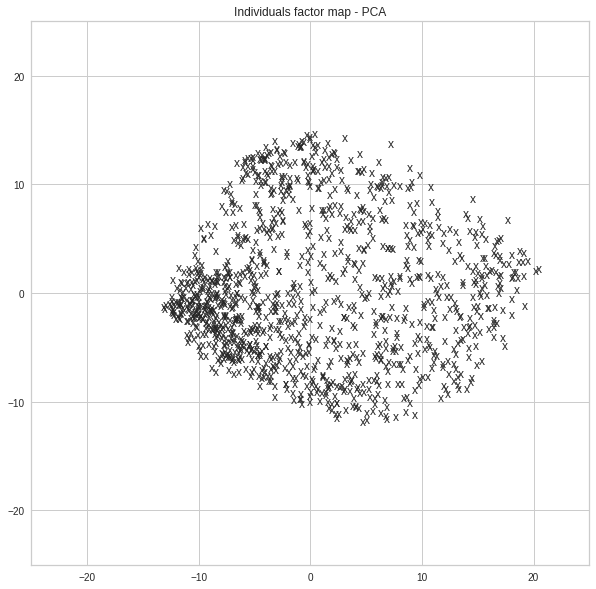

In [29]:
pc1 = principalComponents[:,0]
pc2 = principalComponents[:,1]
plt.figure(figsize = (10, 10))
for i, j in zip(pc1, pc2):
    plt.text(i, j, "x")
plt.axis((-25, 25, -25, 25))
plt.title('Individuals factor map - PCA')
plt.show()

# Clustering of the data
l'idée est de faire:
-Aglomerative pour voir le nombre de groupe
-

## K-means

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

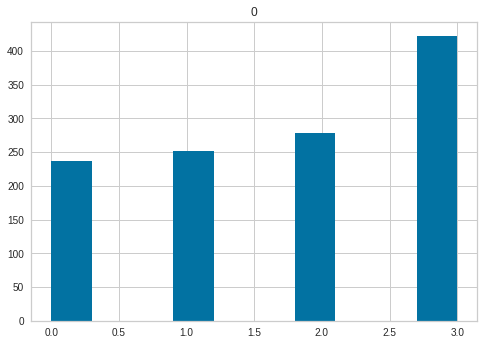

In [50]:
selectPrincipalComponents = principalComponents[:,0:3]
selectKmeans = KMeans(n_clusters = 4, random_state = 0).fit(selectPrincipalComponents)
kclassesACP = selectKmeans.labels_
pd.DataFrame(kclassesACP).hist()

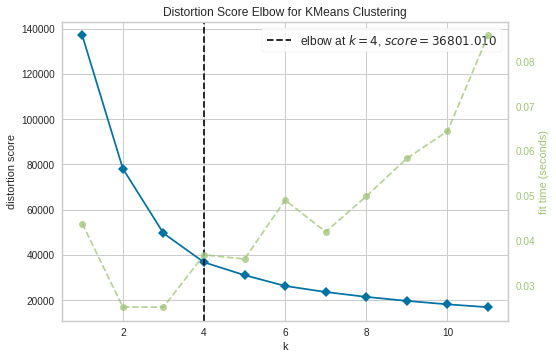

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(selectPrincipalComponents)   
visualizer.show()    

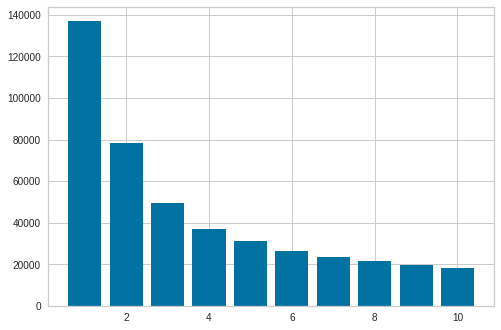

In [52]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(selectPrincipalComponents)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.bar(range(1, 11), inertia)
plt.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

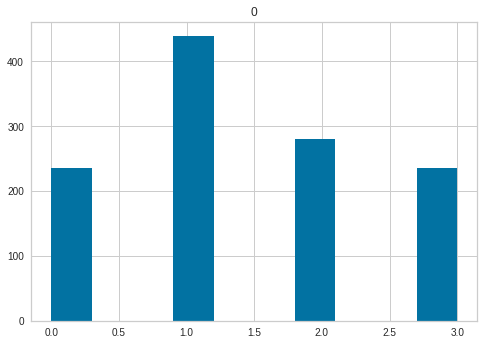

In [53]:
kmeans=KMeans(n_clusters = 4, random_state = 0).fit(principalComponents)
kclasses = kmeans.labels_
pd.DataFrame(kclasses).hist()

In [54]:
def crossTable(classe1, classe2):
    table = pd.crosstab(classe1, classe2, 
                        rownames = ['classes ACP'], colnames = ['classes données brutes'])
    a = np.zeros(np.shape(table)[0])
    b = np.zeros(np.shape(table)[0])
    for j in range (0, np.shape(table)[0]):
        for i in range (0, np.shape(table)[0]):
            if (a[j] < table[i][j]):
                a[j] = table[i][j]
                b[j] = i                       
                                             
    print ("")
    print ("max colonne", a)
    print ("j=", b)
    print ("")
    tablebis = np.copy(table)
    for i in range (0, np.shape(table)[0]):
        tablebis[i][:] = table[b[i]][:]        
    return tablebis

In [55]:
crossTable(selectKmeans.labels_, kmeans.labels_)


max colonne [235. 233. 277. 421.]
j= [0. 3. 2. 1.]



array([[235,   0,   0,   0],
       [  2, 233,   0,   0],
       [  0,   2, 277,   1],
       [  0,  17,   1, 421]])

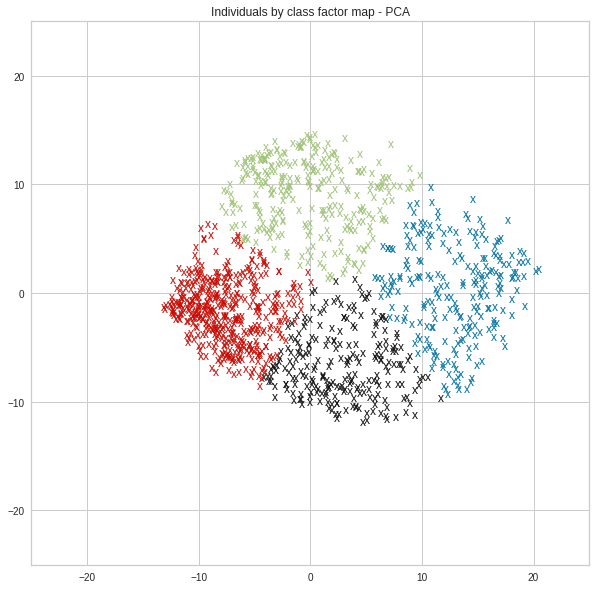

In [56]:
pc1 = principalComponents[:,0]
pc2 = principalComponents[:,1]
coul = ['b', 'r', 'g', 'k', 'y']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kmeans.labels_):
    plt.text(i, j, "x", color = coul[indcoul])
plt.axis((-25, 25, -25, 25))
plt.title('Individuals by class factor map - PCA')
plt.show()

# Agglomerative clustering

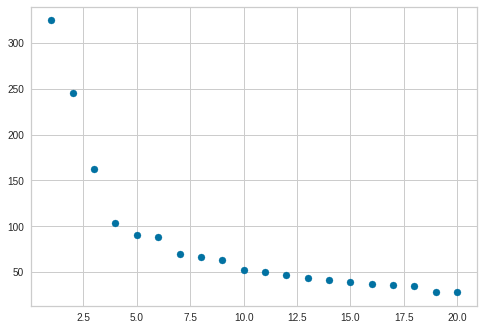

In [21]:
ac = AgglomerativeClustering(n_clusters=6, linkage="ward",  compute_distances=True)
clusters_ac = ac.fit_predict(selectPrincipalComponents)

distances = ac.distances_

n_sizes = 20

x = np.arange(n_sizes, 0, -1)
y = ac.distances_[-20:]

plt.scatter(x, y)
plt.show()

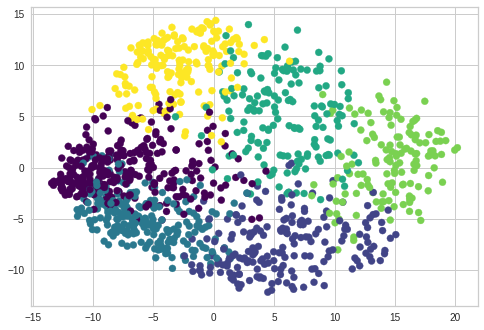

In [22]:

ac = AgglomerativeClustering(n_clusters=6,linkage='ward') 
clusters = ac.fit_predict(selectPrincipalComponents)

plt.scatter(principalComponents[:, 0], principalComponents[:,1], c=clusters, cmap='viridis')
plt.show()

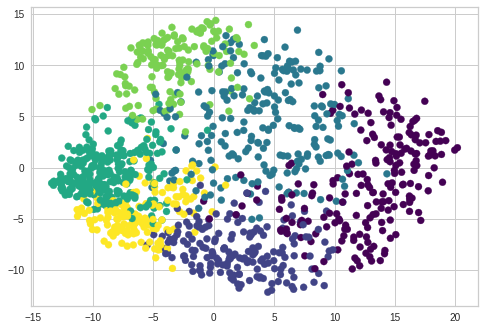

In [23]:
ac = AgglomerativeClustering(n_clusters=6,linkage='ward') 
clusters = ac.fit_predict(loading)

plt.scatter(principalComponents[:, 0], principalComponents[:,1], c=clusters, cmap='viridis')
plt.show()

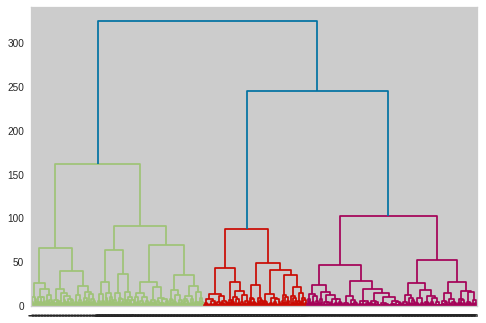

In [48]:


ac = AgglomerativeClustering(n_clusters=6, compute_distances=True)
clusters = ac.fit(selectPrincipalComponents)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.c_[children, distances, n_observations]

dendrogram(linkage_matrix, labels=ac.labels_)
plt.show()

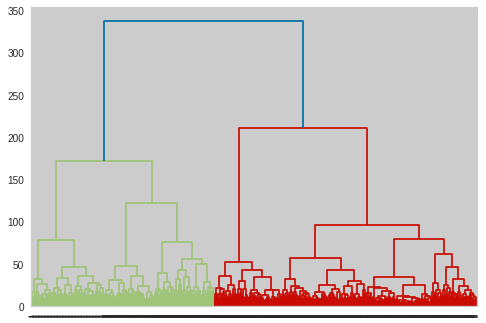

In [57]:

ac = AgglomerativeClustering(n_clusters=6, compute_distances=True)
clusters = ac.fit(principalComponents)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(4, children.shape[0]+4)

linkage_matrix = np.c_[children, distances, n_observations]

dendrogram(linkage_matrix, labels=ac.labels_)
plt.show()

# Gaussian Mixture


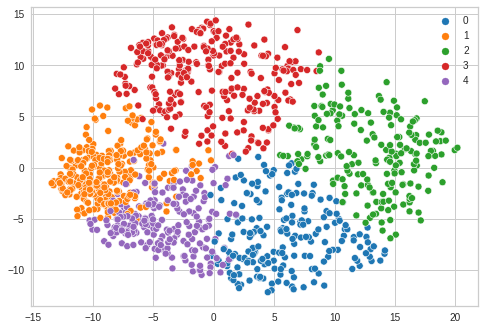

In [43]:
gm = GaussianMixture(n_components=5)
clusters = gm.fit_predict(principalComponents)

sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:,1], hue=clusters, palette="tab10")
plt.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

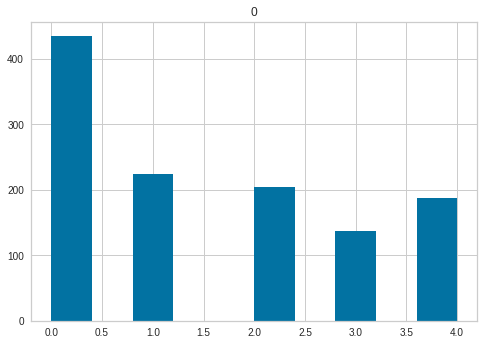

In [30]:
# identification des classes
classesGMM = gmm.predict(loading)
# Effectifs des classes
pd.DataFrame(classesGMM).hist()

In [31]:
crossTable(classesGMM, kclasses)


max colonne [405. 210. 198. 131. 185.]
j= [1. 0. 3. 4. 2.]



array([[405,   0,   0,   0,   2],
       [ 28, 210,   0,   1,   1],
       [  0,   9, 198,   1,   0],
       [  2,   5,   7, 131,   0],
       [  0,   0,   0,   4, 185]])